In [ ]:
from google.colab import files
uploaded = files.upload()


Saving flight_data.csv to flight_data.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GlobalAirportDatabase.txt to GlobalAirportDatabase.txt


In [ ]:
import pandas as pd


df = pd.read_csv('flight_data.csv')
#everything else 'Flight_ID', 'Date', 'Time', 'Departure_Airport', 'Arrival_Airport','Temperature_Celsius', 'Wind_Speed_knots', 'Turbulence_Level','Visibility_km'

#longitut,lattitude and Abbr
airport_data = []
with open("GlobalAirportDatabase.txt", "r") as file:
    for line in file:
        data = line.strip().split(":")
        airport_data.append(data)

# column names
columns = ["ICAO_Code", "Abbr", "Airport_Name", "City", "Country", "Latitude_Degrees", "Latitude_Minutes", "Latitude_Seconds", "Latitude_Direction",
           "Longitude_Degrees", "Longitude_Minutes", "Longitude_Seconds", "Longitude_Direction", "Altitude", "Latitude_Decimal", "Longitude_Decimal"]
location_df = pd.DataFrame(airport_data, columns=columns)

print(location_df)


     ICAO_Code Abbr Airport_Name         City           Country  \
0         AYGA  GKA       GOROKA       GOROKA  PAPUA NEW GUINEA   
1         AYLA  LAE          N/A          LAE  PAPUA NEW GUINEA   
2         AYMD  MAG       MADANG       MADANG  PAPUA NEW GUINEA   
3         AYMH  HGU  MOUNT HAGEN  MOUNT HAGEN  PAPUA NEW GUINEA   
4         AYNZ  LAE       NADZAB       NADZAB  PAPUA NEW GUINEA   
...        ...  ...          ...          ...               ...   
9295      ZYTK  N/A          N/A     SHENYANG             CHINA   
9296      ZYTL  DLC   ZHOUSHUIZI       DALIAN             CHINA   
9297      ZYXC  N/A          N/A    XIANCHENG             CHINA   
9298      ZYYC  N/A          N/A       YICHUN             CHINA   
9299      ZYYJ  N/A        YANJI        YANJI             CHINA   

     Latitude_Degrees Latitude_Minutes Latitude_Seconds Latitude_Direction  \
0                 006              004              054                  S   
1                 000              000 

In [ ]:
df

,Flight_ID,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km
0,142,2024-10-11,10:25,ATL Airport,SEA Airport,35,45,High,19
1,110,2024-01-20,18:38,IAH Airport,AUS Airport,3,25,Low,6
2,113,2024-12-26,12:50,STL Airport,SEA Airport,20,48,Medium,6
3,3,2024-08-19,07:28,MCO Airport,LAS Airport,33,48,High,18
4,22,2024-12-07,07:10,LAX Airport,SEA Airport,28,34,Low,20
...,...,...,...,...,...,...,...,...,...
9995,113,2024-10-17,11:44,CLT Airport,AUS Airport,-15,17,High,2
9996,128,2024-11-16,20:02,PHL Airport,CMH Airport,-8,6,Medium,12
9997,9,2024-07-23,13:16,LAS Airport,DEN Airport,9,22,Medium,4
9998,51,2024-05-19,13:29,TPA Airport,SAN Airport,-11,2,Medium,12


In [ ]:
# Check for null or empty values in each column
null_columns = df.columns[df.isnull().any()]
empty_columns = df.columns[(df == '').any()]

if len(null_columns) > 0:
    print("Columns with null values:")
    print(null_columns)
else:
  print("No null vals")

if len(empty_columns) > 0:
    print("Columns with empty values:")
    print(empty_columns)
else:
  print("No empty vals")


No null vals
No empty vals


In [ ]:
print(df.columns)

Index(['Flight_ID', 'Date', 'Time', 'Departure_Airport', 'Arrival_Airport',
       'Temperature_Celsius', 'Wind_Speed_knots', 'Turbulence_Level',
       'Visibility_km'],
      dtype='object')


In [ ]:
df['Time_1'] = df['Time']

In [ ]:
# print(df[['Date', 'Time']])
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Assuming 'Time' column is already in datetime format, if not, convert it
df['Time'] = pd.to_datetime(df['Time'])

# Combine 'Date' and 'Time' into a single column
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Time'].dt.strftime('%H:%M:%S'))
df.drop(columns=['Time'], inplace=True)

In [ ]:
df

,Flight_ID,Date,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km,Time_1,Datetime
0,142,2024-10-11,ATL Airport,SEA Airport,35,45,High,19,10:25,2024-10-11 10:25:00
1,110,2024-01-20,IAH Airport,AUS Airport,3,25,Low,6,18:38,2024-01-20 18:38:00
2,113,2024-12-26,STL Airport,SEA Airport,20,48,Medium,6,12:50,2024-12-26 12:50:00
3,3,2024-08-19,MCO Airport,LAS Airport,33,48,High,18,07:28,2024-08-19 07:28:00
4,22,2024-12-07,LAX Airport,SEA Airport,28,34,Low,20,07:10,2024-12-07 07:10:00
...,...,...,...,...,...,...,...,...,...,...
9995,113,2024-10-17,CLT Airport,AUS Airport,-15,17,High,2,11:44,2024-10-17 11:44:00
9996,128,2024-11-16,PHL Airport,CMH Airport,-8,6,Medium,12,20:02,2024-11-16 20:02:00
9997,9,2024-07-23,LAS Airport,DEN Airport,9,22,Medium,4,13:16,2024-07-23 13:16:00
9998,51,2024-05-19,TPA Airport,SAN Airport,-11,2,Medium,12,13:29,2024-05-19 13:29:00


In [ ]:
#cunverting knots to m/h
#nautical mile
nmile = 1.15078
df['Wind_Speed_mph'] = df['Wind_Speed_knots'] * nmile
df

,Flight_ID,Date,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km,Time_1,Datetime,Wind_Speed_mph
0,142,2024-10-11,ATL Airport,SEA Airport,35,45,High,19,10:25,2024-10-11 10:25:00,51.78510
1,110,2024-01-20,IAH Airport,AUS Airport,3,25,Low,6,18:38,2024-01-20 18:38:00,28.76950
2,113,2024-12-26,STL Airport,SEA Airport,20,48,Medium,6,12:50,2024-12-26 12:50:00,55.23744
3,3,2024-08-19,MCO Airport,LAS Airport,33,48,High,18,07:28,2024-08-19 07:28:00,55.23744
4,22,2024-12-07,LAX Airport,SEA Airport,28,34,Low,20,07:10,2024-12-07 07:10:00,39.12652
...,...,...,...,...,...,...,...,...,...,...,...
9995,113,2024-10-17,CLT Airport,AUS Airport,-15,17,High,2,11:44,2024-10-17 11:44:00,19.56326
9996,128,2024-11-16,PHL Airport,CMH Airport,-8,6,Medium,12,20:02,2024-11-16 20:02:00,6.90468
9997,9,2024-07-23,LAS Airport,DEN Airport,9,22,Medium,4,13:16,2024-07-23 13:16:00,25.31716
9998,51,2024-05-19,TPA Airport,SAN Airport,-11,2,Medium,12,13:29,2024-05-19 13:29:00,2.30156


In [ ]:

# Conversion from kilometers to feet fro visability
# Convert 'Visibility_km' column to numeric
df['Visibility_km'] = pd.to_numeric(df['Visibility_km'], errors='coerce')


non_numeric_values = df['Visibility_km'].loc[df['Visibility_km'].apply(lambda x: not isinstance(x, (int, float)))]
print("Non-numeric values in 'Visibility_km' column:")
print(non_numeric_values)
conversion_factor = 1.609
df['Visibility_mile'] = df['Visibility_km'] / conversion_factor

# Convert temperature from Celsius to Fahrenheit
df['Temperature_Fahrenheit'] = (df['Temperature_Celsius'] * 9/5) + 32


#Taking away Airport from depart/arrival to match long.lat data set abbr
df['Departure_Airport'] = df['Departure_Airport'].str.replace(' Airport', '')
df['Arrival_Airport'] = df['Arrival_Airport'].str.replace(' Airport', '')
print(df)

Non-numeric values in 'Visibility_km' column:
Series([], Name: Visibility_km, dtype: float64)
      Flight_ID       Date Departure_Airport Arrival_Airport  \
0           142 2024-10-11               ATL             SEA   
1           110 2024-01-20               IAH             AUS   
2           113 2024-12-26               STL             SEA   
3             3 2024-08-19               MCO             LAS   
4            22 2024-12-07               LAX             SEA   
...         ...        ...               ...             ...   
9995        113 2024-10-17               CLT             AUS   
9996        128 2024-11-16               PHL             CMH   
9997          9 2024-07-23               LAS             DEN   
9998         51 2024-05-19               TPA             SAN   
9999        193 2024-10-26               CLT             IND   

      Temperature_Celsius  Wind_Speed_knots Turbulence_Level  Visibility_km  \
0                      35                45             Hi

In [ ]:
#Turning Months to season

df['Date'] = pd.to_datetime(df['Date'])


def month_to_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Fall
df['Season'] = df['Date'].dt.month.apply(month_to_season)

# Print the DataFrame to verify the changes
print(df[['Date', 'Season']])


           Date  Season
0    2024-10-11       3
1    2024-01-20       0
2    2024-12-26       0
3    2024-08-19       2
4    2024-12-07       0
...         ...     ...
9995 2024-10-17       3
9996 2024-11-16       3
9997 2024-07-23       2
9998 2024-05-19       1
9999 2024-10-26       3

[10000 rows x 2 columns]


In [ ]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())



Summary Statistics for Numerical Columns:
          Flight_ID  Temperature_Celsius  Wind_Speed_knots  Visibility_km  \
count  10000.000000         10000.000000      10000.000000    9999.000000   
mean     100.685700            10.314800         24.906100      10.505951   
std       57.392387            17.594467         14.812286       5.753430   
min        1.000000           -20.000000          0.000000       1.000000   
25%       50.000000            -5.000000         12.000000       6.000000   
50%      102.000000            11.000000         25.000000      11.000000   
75%      150.000000            25.000000         38.000000      15.000000   
max      200.000000            40.000000         50.000000      20.000000   

       Wind_Speed_mph  Visibility_mile  Temperature_Fahrenheit        Season  
count    10000.000000      9999.000000             10000.00000  10000.000000  
mean        28.661442         6.529491                50.56664      1.495400  
std         17.045683     

In [ ]:
df.columns

Index(['Flight_ID', 'Date', 'Departure_Airport', 'Arrival_Airport',
       'Temperature_Celsius', 'Wind_Speed_knots', 'Turbulence_Level',
       'Visibility_km', 'Time_1', 'Datetime', 'Wind_Speed_mph',
       'Visibility_mile', 'Temperature_Fahrenheit', 'Season'],
      dtype='object')

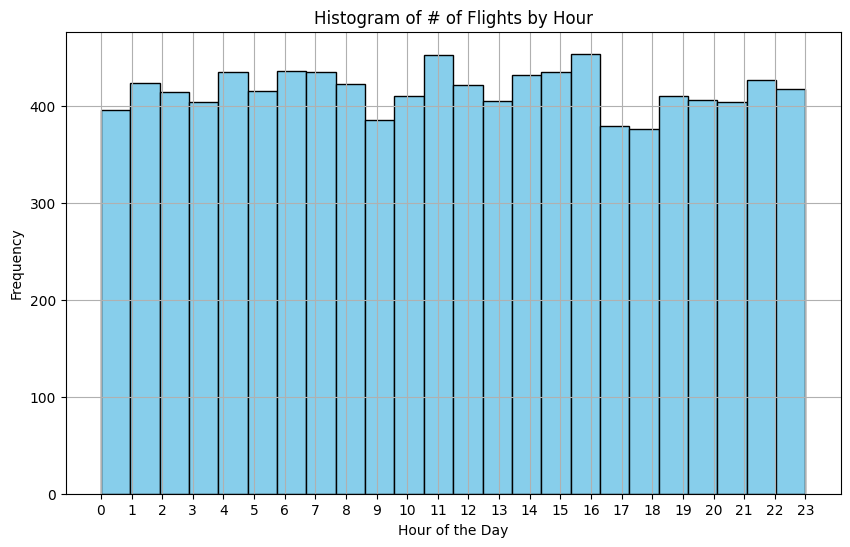

In [ ]:
from matplotlib import pyplot as plt
df['Time_1'] = pd.to_datetime(df['Time_1'])

# Plot histogram of 'Time_1' column by hour
plt.figure(figsize=(10, 6))
plt.hist(df['Time_1'].dt.hour, bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Histogram of # of Flights by Hour')
plt.xticks(range(24))
plt.grid(True)
plt.show()

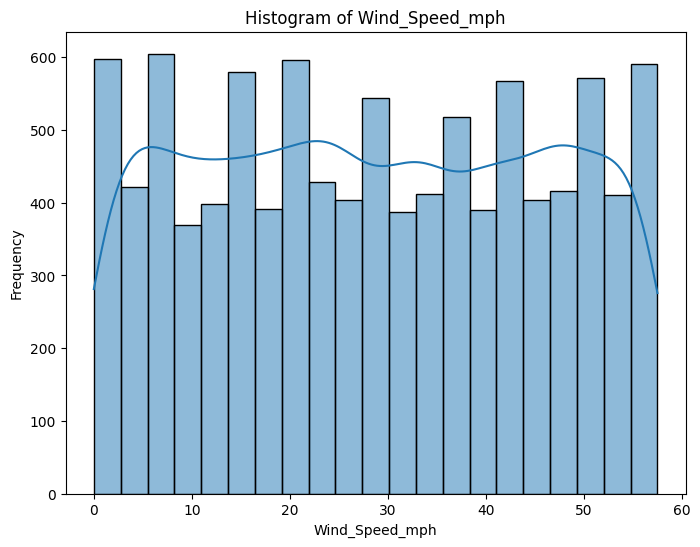

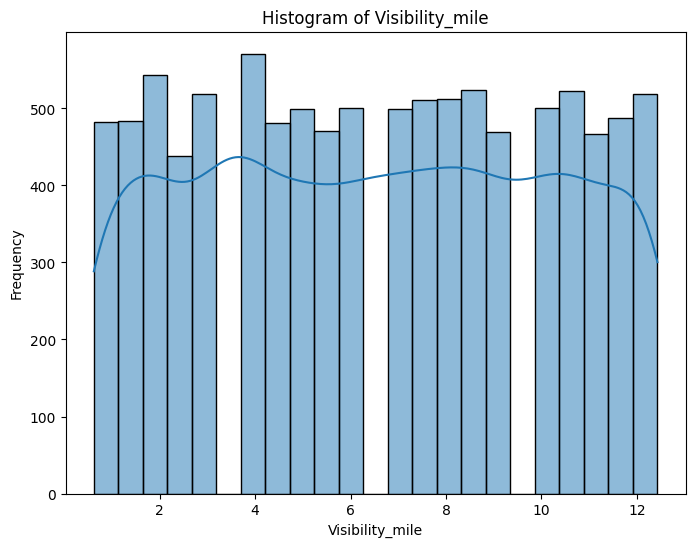

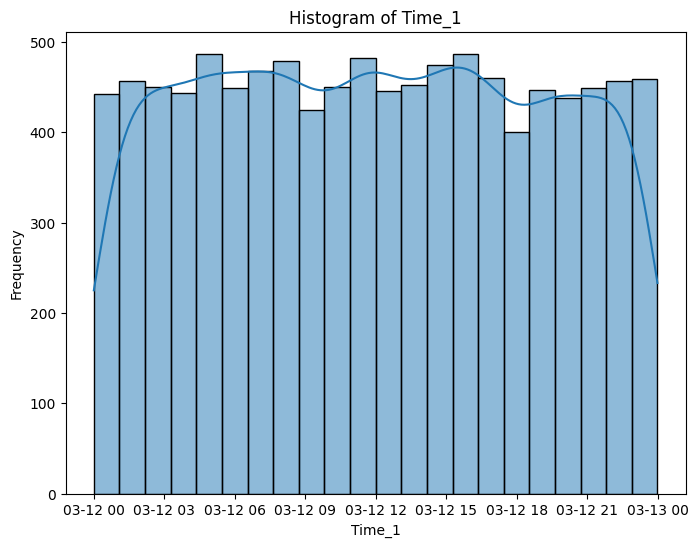

In [ ]:

# Data Visualization
# Histograms
import matplotlib.pyplot as plt
import seaborn as sns
histgram = ['Wind_Speed_mph','Visibility_mile','Time_1']
for column in histgram:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()





In [ ]:
# Convert 'Time_1' column to new column 'Hour' representing the hour component
df['Time_1'] = pd.to_datetime(df['Time_1'])
df['Hour'] = df['Time_1'].dt.hour

print(df)

      Flight_ID       Date Departure_Airport Arrival_Airport  \
0           142 2024-10-11               ATL             SEA   
1           110 2024-01-20               IAH             AUS   
2           113 2024-12-26               STL             SEA   
3             3 2024-08-19               MCO             LAS   
4            22 2024-12-07               LAX             SEA   
...         ...        ...               ...             ...   
9995        113 2024-10-17               CLT             AUS   
9996        128 2024-11-16               PHL             CMH   
9997          9 2024-07-23               LAS             DEN   
9998         51 2024-05-19               TPA             SAN   
9999        193 2024-10-26               CLT             IND   

      Temperature_Celsius  Wind_Speed_knots Turbulence_Level  Visibility_km  \
0                      35                45             High           19.0   
1                       3                25              Low            6

In [ ]:
# Mapping turbulence levels to numbers
turbulence_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

df['Turbulence_Numerical'] = df['Turbulence_Level'].map(turbulence_mapping)
print(df)


      Flight_ID       Date Departure_Airport Arrival_Airport  \
0           142 2024-10-11               ATL             SEA   
1           110 2024-01-20               IAH             AUS   
2           113 2024-12-26               STL             SEA   
3             3 2024-08-19               MCO             LAS   
4            22 2024-12-07               LAX             SEA   
...         ...        ...               ...             ...   
9995        113 2024-10-17               CLT             AUS   
9996        128 2024-11-16               PHL             CMH   
9997          9 2024-07-23               LAS             DEN   
9998         51 2024-05-19               TPA             SAN   
9999        193 2024-10-26               CLT             IND   

      Temperature_Celsius  Wind_Speed_knots Turbulence_Level  Visibility_km  \
0                      35                45             High           19.0   
1                       3                25              Low            6

In [ ]:

#  day of the week from a datetime column
df['Day_of_Week'] = df['Datetime'].dt.day_name()

day_to_num = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# num day of week
df['DayNumeric'] = df['Day_of_Week'].map(day_to_num)

In [ ]:
df.columns


Index(['Flight_ID', 'Date', 'Departure_Airport', 'Arrival_Airport',
       'Temperature_Celsius', 'Wind_Speed_knots', 'Turbulence_Level',
       'Visibility_km', 'Time_1', 'Datetime', 'Wind_Speed_mph',
       'Visibility_mile', 'Temperature_Fahrenheit', 'Season', 'Hour',
       'Turbulence_Numerical', 'Day_of_Week', 'DayNumeric'],
      dtype='object')

Correlation with Turbulence_Numeric:
Hour                    0.009558
Season                 -0.014935
Wind_Speed_knots       -0.011788
Temperature_Celsius     0.006028
Visibility_km           0.010378
Turbulence_Numerical    1.000000
Name: Turbulence_Numerical, dtype: float64


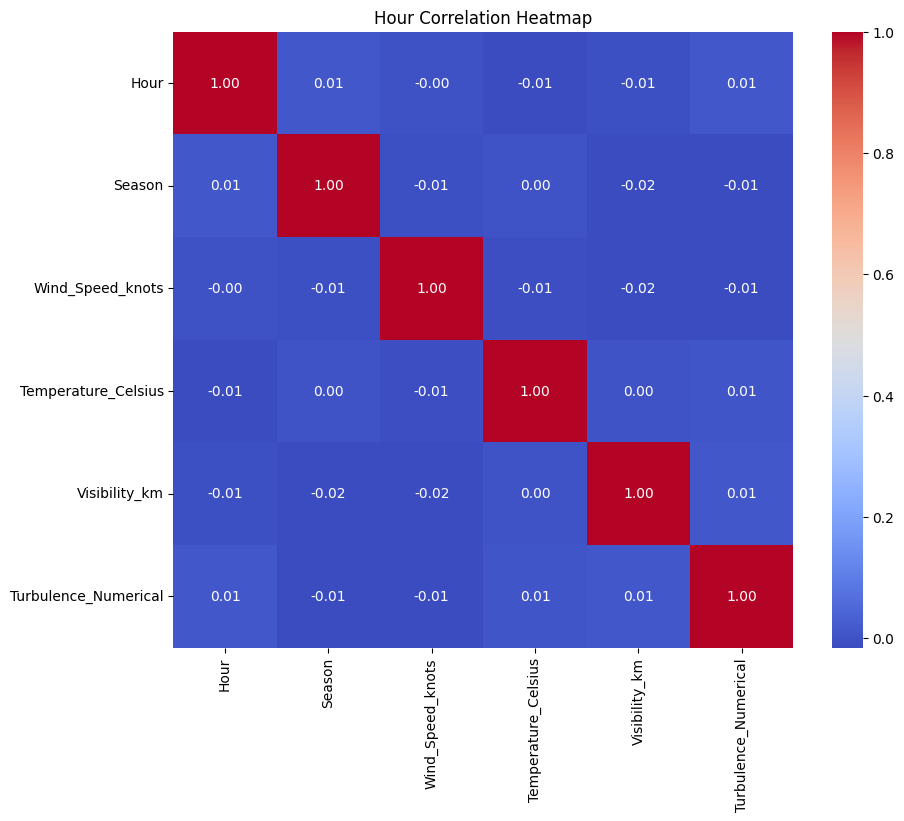

In [ ]:
import pandas as pd


# Compute correlation matrix orginal units
hour_correlation = df[['Hour', 'Season', 'Wind_Speed_knots', 'Temperature_Celsius', 'Visibility_km', 'Turbulence_Numerical']].corr()

print("Correlation with Turbulence_Numeric:")
print(hour_correlation['Turbulence_Numerical'])


# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(hour_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Hour Correlation Heatmap")
plt.show()

Correlation with Turbulence:
Turbulence_Numerical      1.000000
Hour                      0.009558
Wind_Speed_mph           -0.011788
Temperature_Fahrenheit    0.006028
Visibility_mile           0.010378
Season                   -0.014935
Name: Turbulence_Numerical, dtype: float64


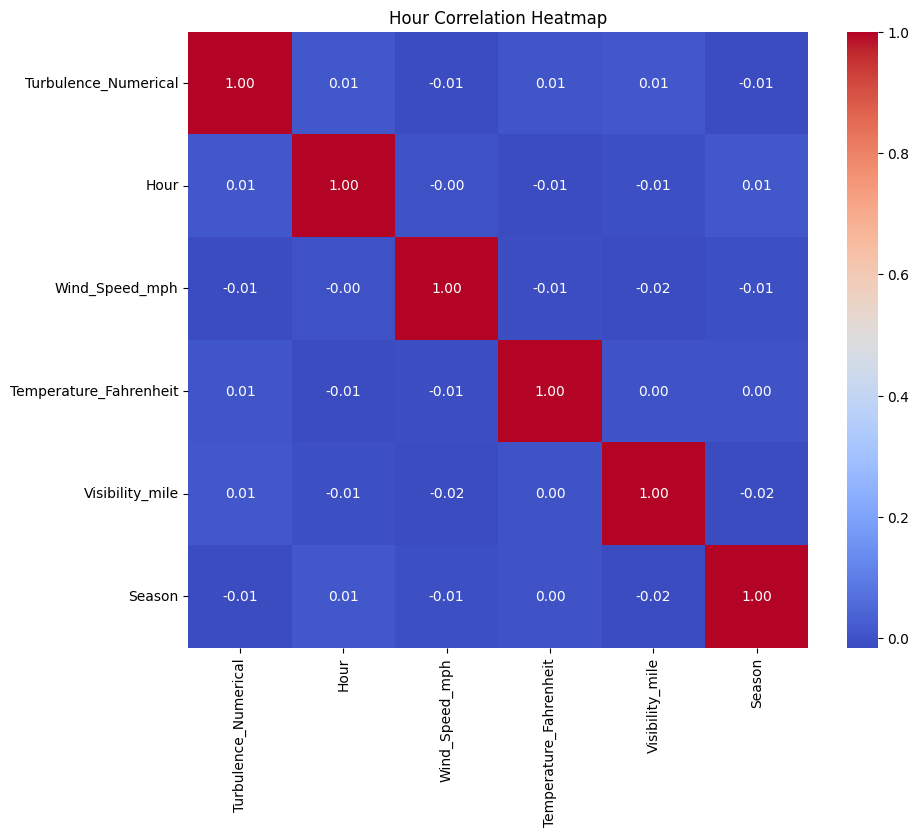

In [ ]:
# tuburlance level correlation matrix/heat map
corr_turbulence = df[['Turbulence_Numerical', 'Hour', 'Wind_Speed_mph', 'Temperature_Fahrenheit', 'Visibility_mile','Season']].corr()

print("Correlation with Turbulence:")
print(corr_turbulence['Turbulence_Numerical'])
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_turbulence, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Hour Correlation Heatmap")
plt.show()

<ipython-input-21-dc6c164e4c9a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


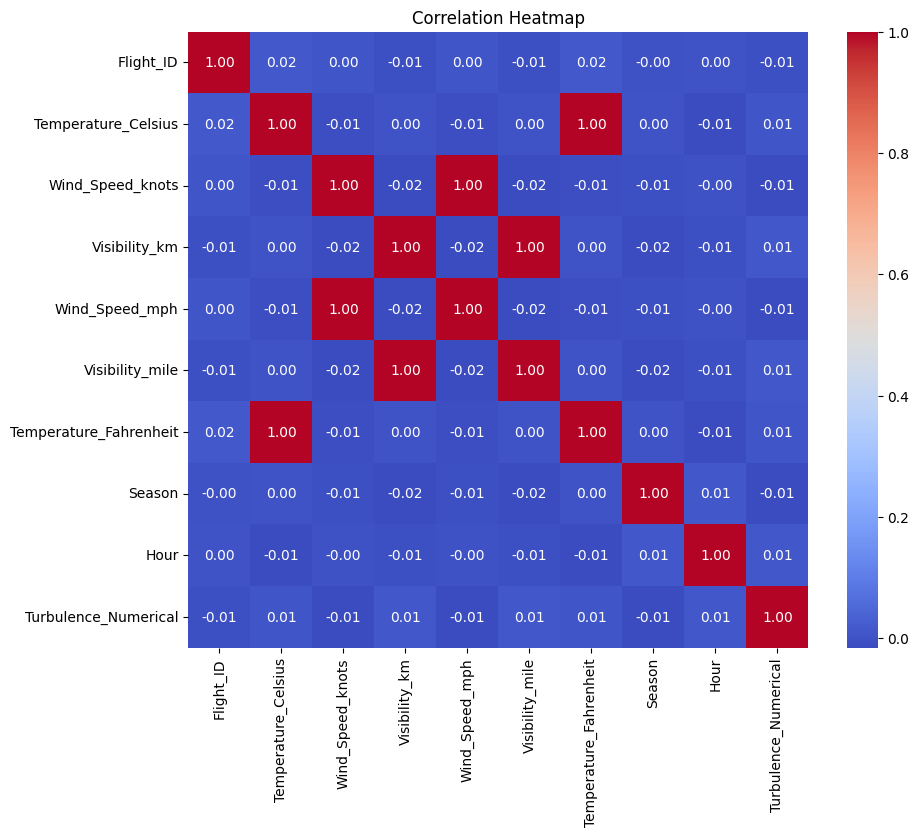

In [ ]:
# Correlation Analysis
# Compute correlations between numerical variables
correlation_matrix = df.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
print(df['Arrival_Airport'])

0       SEA
1       AUS
2       SEA
3       LAS
4       SEA
       ... 
9995    AUS
9996    CMH
9997    DEN
9998    SAN
9999    IND
Name: Arrival_Airport, Length: 10000, dtype: object


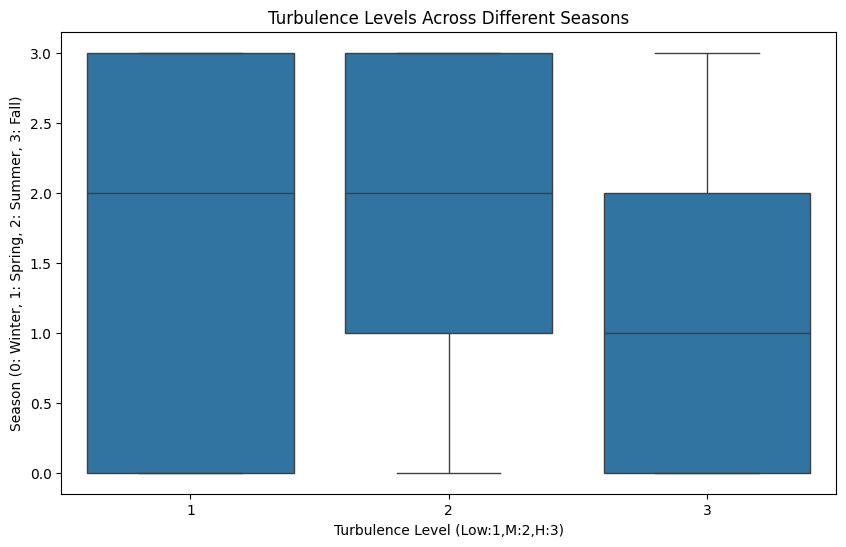

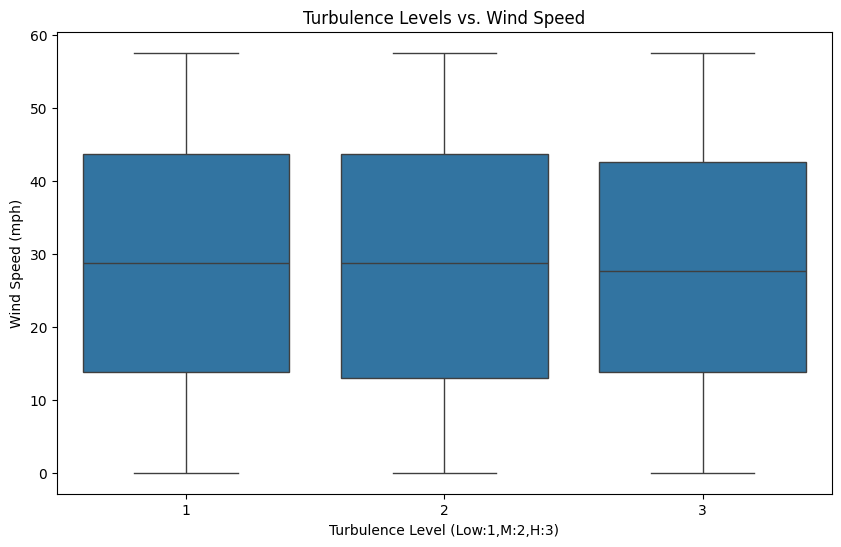

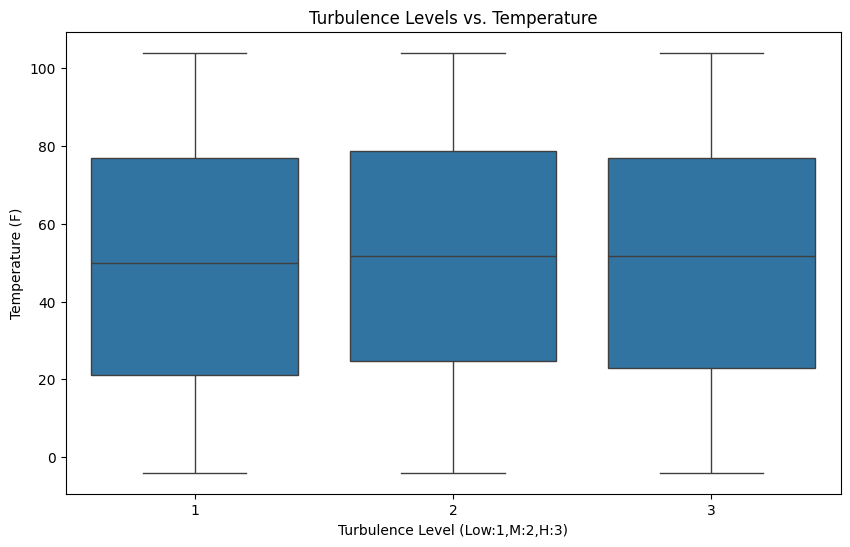

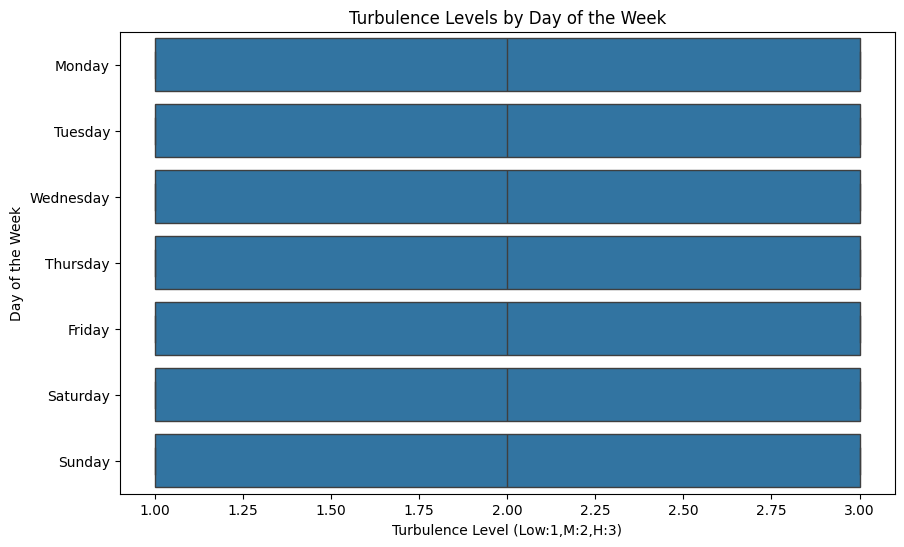

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Turbulence vs. Seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='Turbulence_Numerical', y='Season', data=df)
plt.title('Turbulence Levels Across Different Seasons')
plt.ylabel('Season (0: Winter, 1: Spring, 2: Summer, 3: Fall)')
plt.xlabel('Turbulence Level (Low:1,M:2,H:3)')
plt.show()

# Turbulence vs. Wind Speed (assuming Wind_Speed_knots is the column name)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Turbulence_Numerical', y='Wind_Speed_mph', data=df)
plt.title('Turbulence Levels vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Turbulence Level (Low:1,M:2,H:3)')
plt.show()

# Assuming you want to compare Turbulence with another numerical column, e.g., Temperature
# Replace 'Temperature_Celsius' with the column you're interested in
plt.figure(figsize=(10, 6))
sns.boxplot(x='Turbulence_Numerical', y='Temperature_Fahrenheit', data=df)
plt.title('Turbulence Levels vs. Temperature')
plt.ylabel('Temperature (F)')
plt.xlabel('Turbulence Level (Low:1,M:2,H:3)')
plt.show()



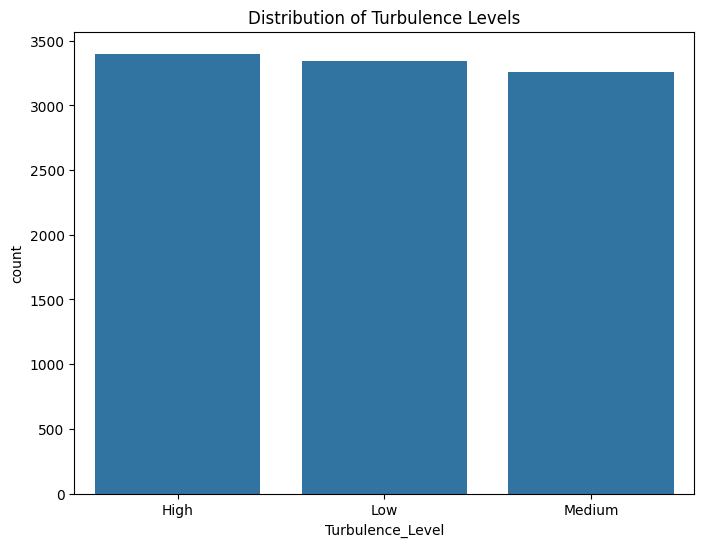

In [ ]:
# Distribution of Turbulence Levels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Turbulence_Level')
plt.title('Distribution of Turbulence Levels')
plt.show()

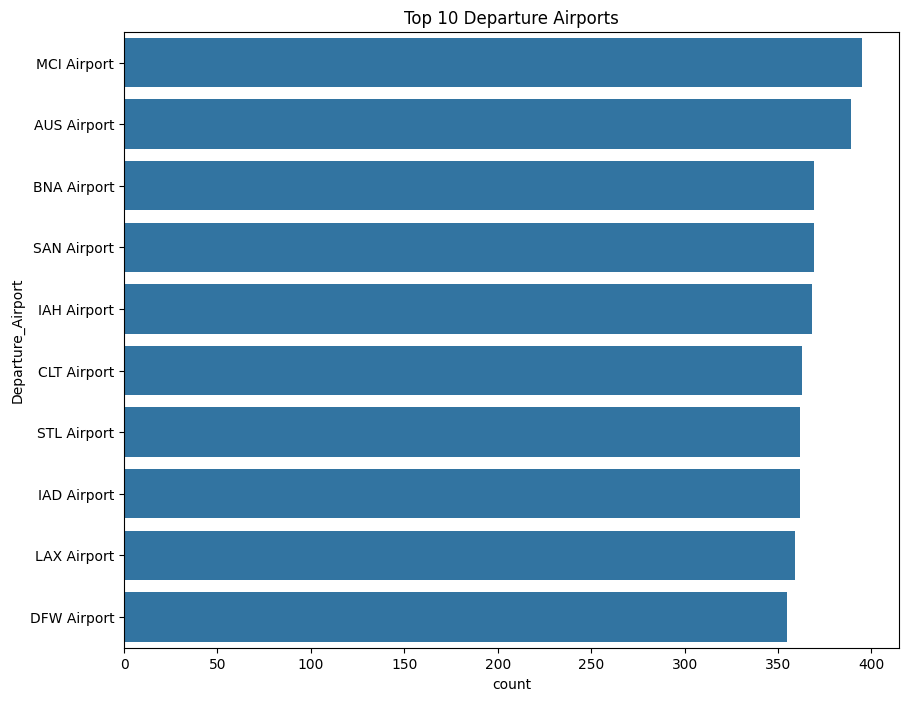

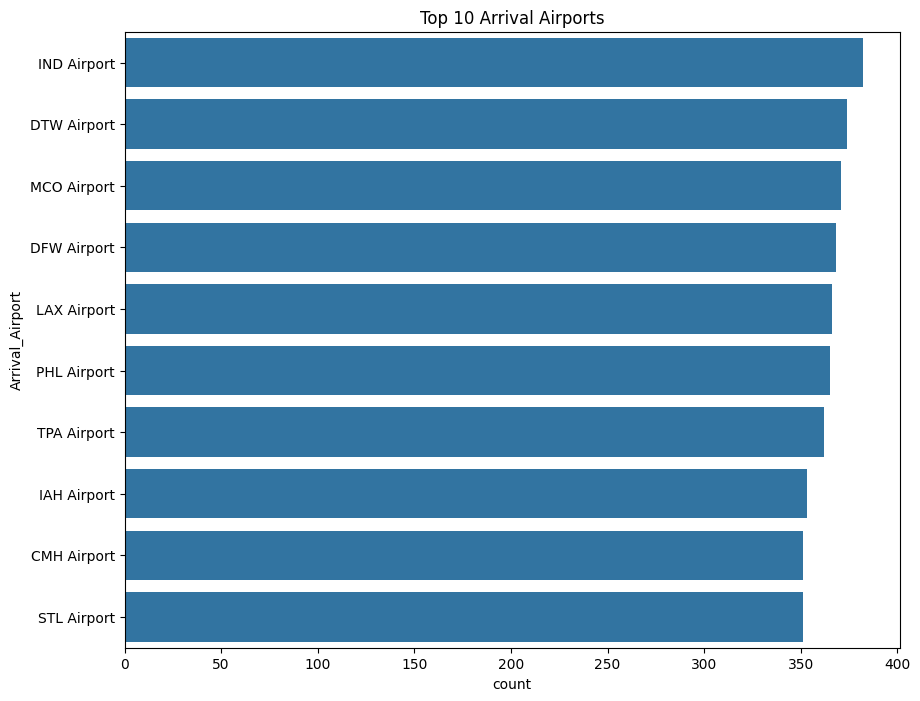

In [ ]:
# Distribution of Departure and Arrival Airports
plt.figure(figsize=(10, 8))
sns.countplot(y='Departure_Airport', data=df, order=df['Departure_Airport'].value_counts().index[:10])
plt.title('Top 10 Departure Airports')
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(y='Arrival_Airport', data=df, order=df['Arrival_Airport'].value_counts().index[:10])
plt.title('Top 10 Arrival Airports')
plt.show()

In [ ]:
# Outlier Detection
#  Z-score method > 3
from scipy import stats

def detect_outliers_zscore(df, threshold=3):
    outliers = []
    for column in df.select_dtypes(include='number').columns:
        z_scores = stats.zscore(df[column])
        outliers.extend(df.index[z_scores > threshold])
    return list(set(outliers))

outliers = detect_outliers_zscore(df)
print("\nOutliers Detected:")
print(outliers)






Outliers Detected:
[]


In [ ]:
location_df.columns

Index(['ICAO_Code', 'Abbr', 'Airport_Name', 'City', 'Country',
       'Latitude_Degrees', 'Latitude_Minutes', 'Latitude_Seconds',
       'Latitude_Direction', 'Longitude_Degrees', 'Longitude_Minutes',
       'Longitude_Seconds', 'Longitude_Direction', 'Altitude',
       'Latitude_Decimal', 'Longitude_Decimal'],
      dtype='object')

In [ ]:
def parse_column_to_dict(df, column_name, location_df):
    value_dict = {}
    unique_values = df[column_name].unique()
    for index, value in enumerate(unique_values):
        if value in location_df['Abbr'].values:
            latitude = location_df.loc[location_df['Abbr'] == value, 'Latitude_Decimal'].iloc[0]
            longitude = location_df.loc[location_df['Abbr'] == value, 'Longitude_Decimal'].iloc[0]
            value_dict[value] = {'Index': index, 'Latitude': latitude, 'Longitude': longitude}
        else:
            print(f"Abbreviation '{value}' not found in location data.")
    return value_dict

#Dicts
depart_dict = parse_column_to_dict(df, 'Departure_Airport', location_df)
arrive_dict = parse_column_to_dict(df, 'Arrival_Airport', location_df)

print(depart_dict)
print(arrive_dict)


{'ATL': {'Index': 0, 'Latitude': '33.640', 'Longitude': '-84.427'}, 'IAH': {'Index': 1, 'Latitude': '29.980', 'Longitude': '-95.340'}, 'STL': {'Index': 2, 'Latitude': '38.748', 'Longitude': '-90.360'}, 'MCO': {'Index': 3, 'Latitude': '28.429', 'Longitude': '-81.316'}, 'LAX': {'Index': 4, 'Latitude': '33.942', 'Longitude': '-118.408'}, 'IND': {'Index': 5, 'Latitude': '39.717', 'Longitude': '-86.294'}, 'PHL': {'Index': 6, 'Latitude': '39.872', 'Longitude': '-75.241'}, 'BOS': {'Index': 7, 'Latitude': '42.364', 'Longitude': '-71.005'}, 'CLT': {'Index': 8, 'Latitude': '35.214', 'Longitude': '-80.943'}, 'PHX': {'Index': 9, 'Latitude': '33.434', 'Longitude': '-112.008'}, 'DFW': {'Index': 10, 'Latitude': '32.896', 'Longitude': '-97.037'}, 'IAD': {'Index': 11, 'Latitude': '38.944', 'Longitude': '-77.456'}, 'ORD': {'Index': 12, 'Latitude': '41.979', 'Longitude': '-87.904'}, 'SAN': {'Index': 13, 'Latitude': '32.733', 'Longitude': '-117.189'}, 'DTW': {'Index': 14, 'Latitude': '42.212', 'Longitude'

In [ ]:
# Function to add new columns based on departure and arrival dictionaries
def add_dict_columns(df, depart_dict, arrive_dict):
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Get the departure and arrival airport abbreviations from the DataFrame
        depart_abbr = row['Departure_Airport']
        arrive_abbr = row['Arrival_Airport']

        # Add departure columns
        depart_index = depart_dict[depart_abbr]['Index']
        df.at[index, f'Depart_Latitude'] = depart_dict[depart_abbr]['Latitude']
        df.at[index, f'Depart_Longitude'] = depart_dict[depart_abbr]['Longitude']
        df.at[index, f'Depart_Index'] = depart_index

        # Add arrival columns
        arrive_index = arrive_dict[arrive_abbr]['Index']
        df.at[index, f'Arrive_Latitude'] = arrive_dict[arrive_abbr]['Latitude']
        df.at[index, f'Arrive_Longitude'] = arrive_dict[arrive_abbr]['Longitude']
        df.at[index, f'Arrive_Index'] = arrive_index

    return df

# Add new columns to the DataFrame
df = add_dict_columns(df, depart_dict, arrive_dict)

# Display the updated DataFrame
print(df)


      Flight_ID       Date Departure_Airport Arrival_Airport  \
0           142 2024-10-11               ATL             SEA   
1           110 2024-01-20               IAH             AUS   
2           113 2024-12-26               STL             SEA   
3             3 2024-08-19               MCO             LAS   
4            22 2024-12-07               LAX             SEA   
...         ...        ...               ...             ...   
9995        113 2024-10-17               CLT             AUS   
9996        128 2024-11-16               PHL             CMH   
9997          9 2024-07-23               LAS             DEN   
9998         51 2024-05-19               TPA             SAN   
9999        193 2024-10-26               CLT             IND   

      Temperature_Celsius  Wind_Speed_knots Turbulence_Level  Visibility_km  \
0                      35                45             High           19.0   
1                       3                25              Low            6

In [ ]:
df.columns

Index(['Flight_ID', 'Date', 'Departure_Airport', 'Arrival_Airport',
       'Temperature_Celsius', 'Wind_Speed_knots', 'Turbulence_Level',
       'Visibility_km', 'Time_1', 'Datetime', 'Wind_Speed_mph',
       'Visibility_mile', 'Temperature_Fahrenheit', 'Season', 'Hour',
       'Turbulence_Numerical', 'Day_of_Week', 'DayNumeric', 'Depart_Latitude',
       'Depart_Longitude', 'Depart_Index', 'Arrive_Latitude',
       'Arrive_Longitude', 'Arrive_Index'],
      dtype='object')

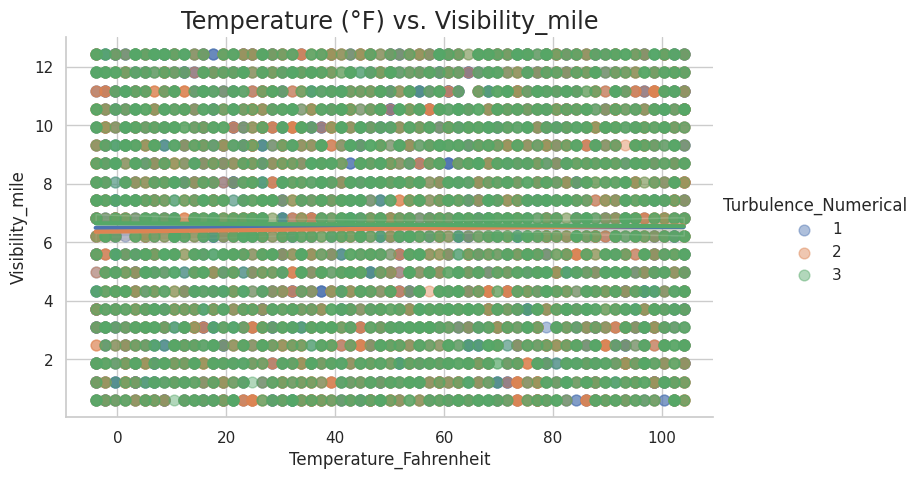

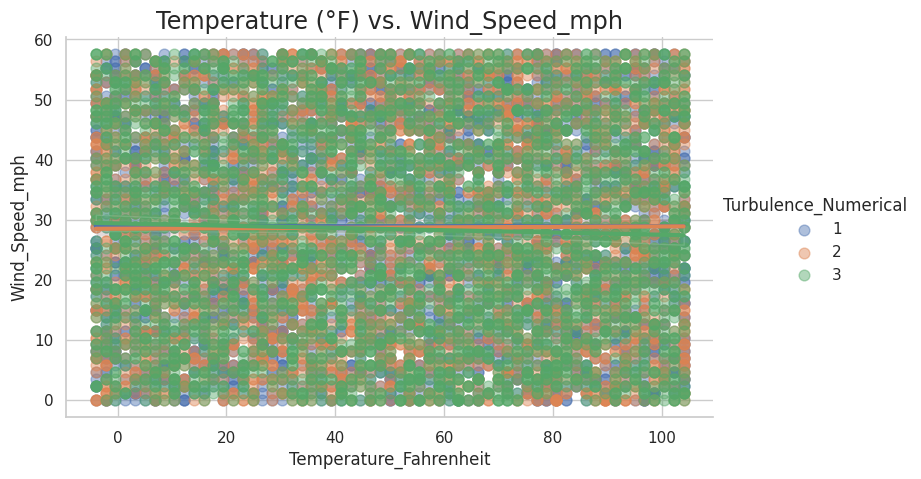

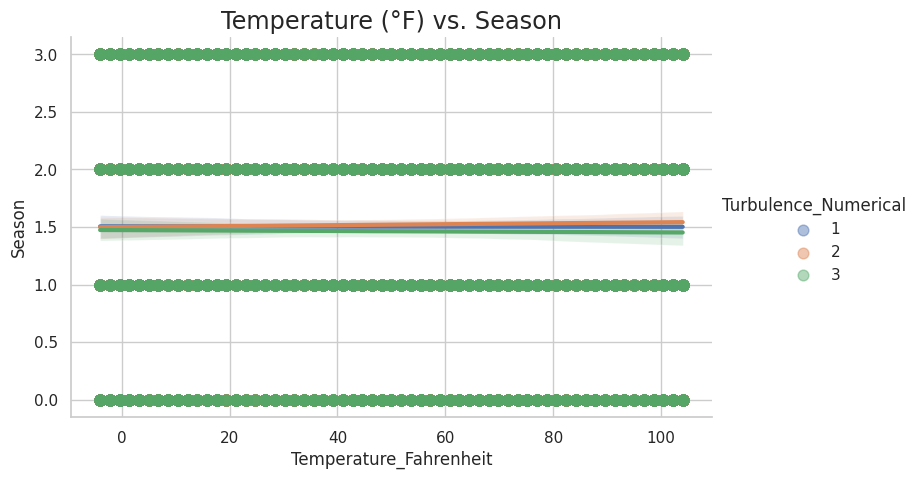

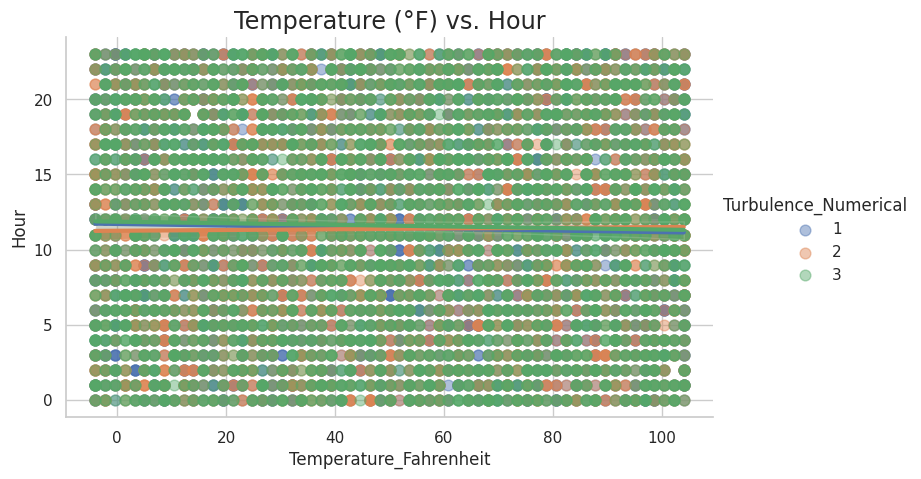

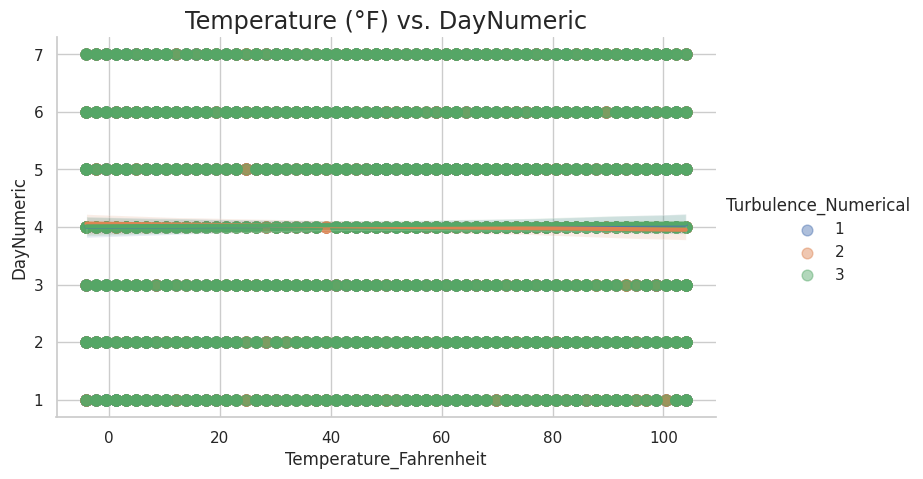

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'Temperature_Fahrenheit', 'Visibility_mile', 'Wind_Speed_mph', and 'Turbulence_Numerical' exist in your DataFrame (df)

cols = ['Visibility_mile', 'Wind_Speed_mph', "Season", 'Hour', 'DayNumeric']

for i in cols:
    sns.set(style="whitegrid")  # 'whitegrid' is often preferred for linear regression plots for better visibility of trends
    # Create an lmplot. Note: lmplot doesn't return a JointGrid object, so the approach to titles is a bit different.
    g = sns.lmplot(x='Temperature_Fahrenheit', y=i, hue='Turbulence_Numerical', data=df, height=5, aspect=1.5, ci=99,scatter_kws={"s": 60, "alpha": 0.45}, line_kws={"linewidth": 3} )

    # Adjust the title using plt.title instead of g.fig.suptitle, as lmplot behaves differently than jointplot
    plt.title(f'Temperature (°F) vs. {i}', fontsize='x-large')

    # Adjust the layout if needed (not as crucial here as for jointplot, but available if necessary)
    plt.subplots_adjust(top=0.9)

    # Show the plot
    plt.show()



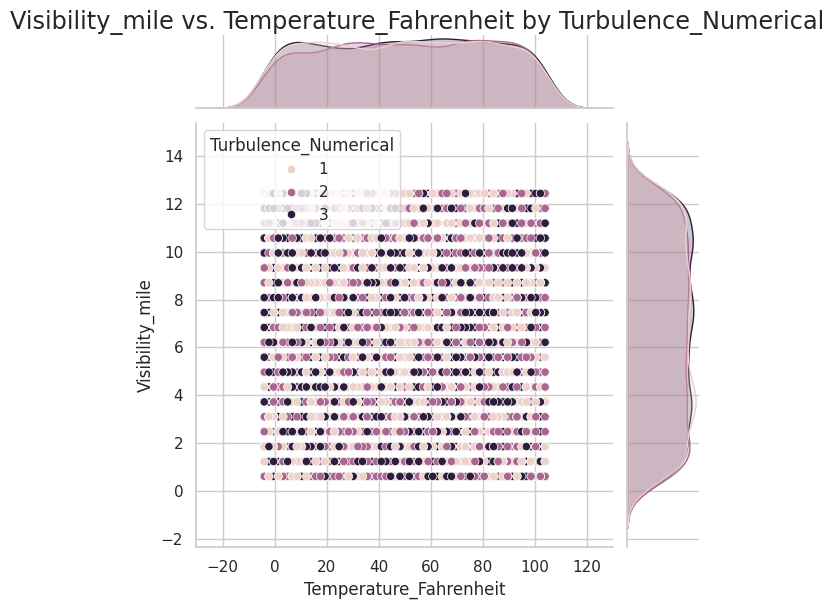

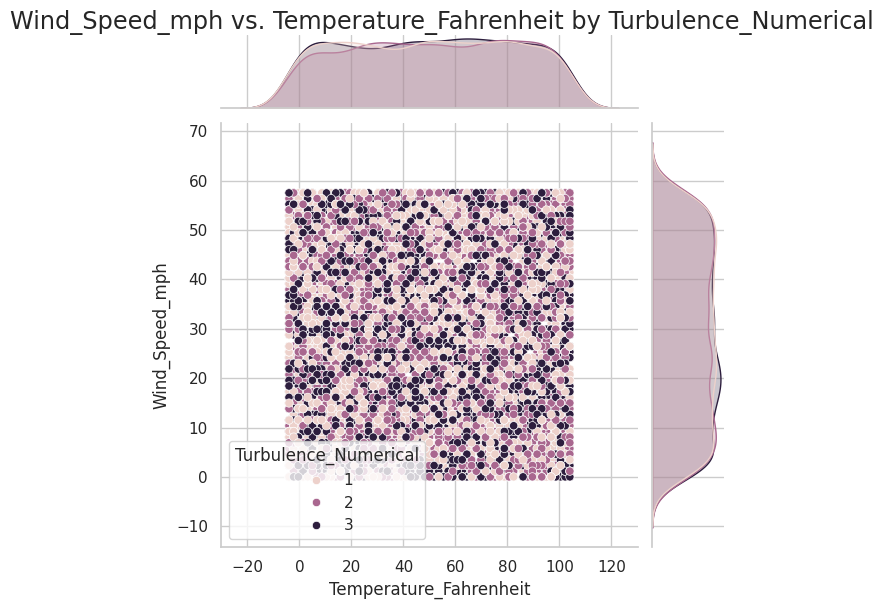

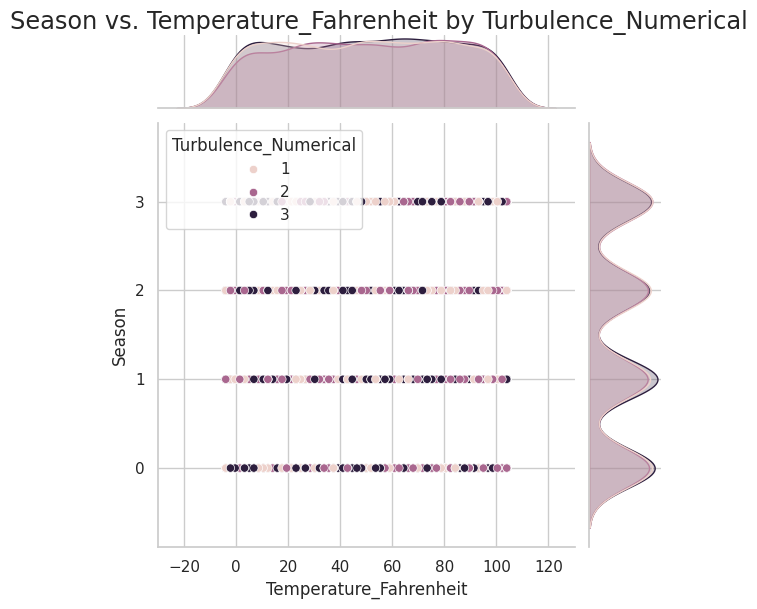

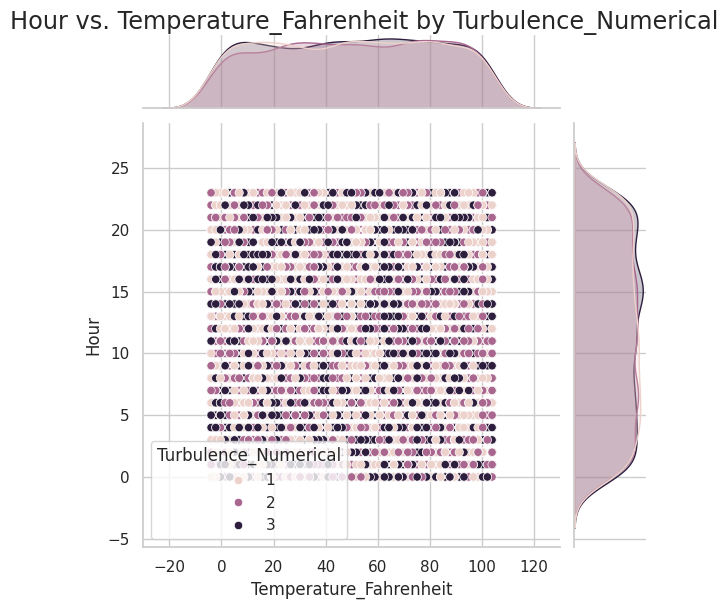

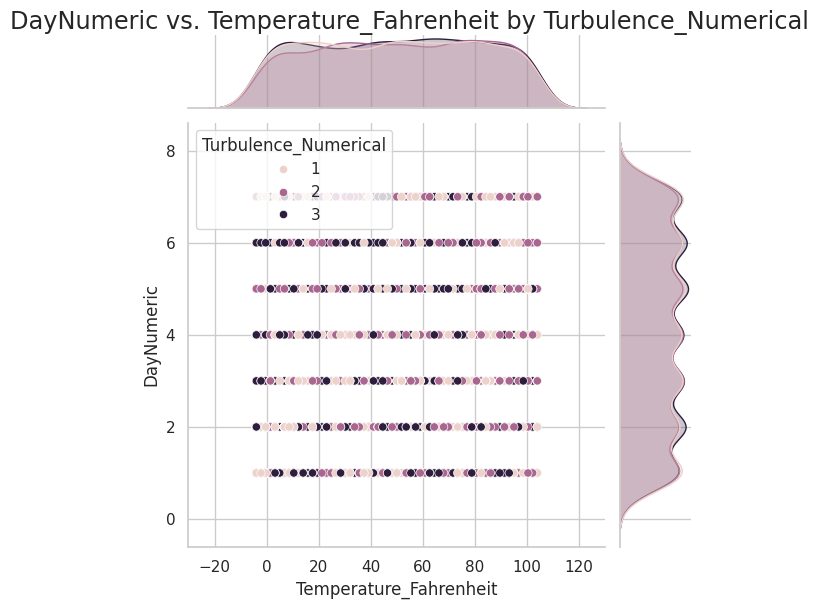

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


cols = ['Visibility_mile', 'Wind_Speed_mph', "Season", 'Hour', 'DayNumeric']
hue = 'Turbulence_Numerical'  # Categorical variable for separate trend lines
data = df  # your DataFrame

for col in cols:
    joint = sns.jointplot(x='Temperature_Fahrenheit', y=col,data=df,hue=hue,kind="scatter" )

    joint.fig.suptitle(f'{col} vs. {x} by {hue}', va='baseline', ha='center', fontsize='x-large')
    plt.show()


In [ ]:
!pip install haversine



In [ ]:
df.columns



Index(['Flight_ID', 'Date', 'Departure_Airport', 'Arrival_Airport',
       'Temperature_Celsius', 'Wind_Speed_knots', 'Turbulence_Level',
       'Visibility_km', 'Time_1', 'Datetime', 'Wind_Speed_mph',
       'Visibility_mile', 'Temperature_Fahrenheit', 'Season', 'Hour',
       'Turbulence_Numerical', 'Day_of_Week', 'DayNumeric', 'Depart_Latitude',
       'Depart_Longitude', 'Depart_Index', 'Arrive_Latitude',
       'Arrive_Longitude', 'Arrive_Index'],
      dtype='object')

In [ ]:
import pandas as pd
from haversine import haversine,Unit

# Assuming df is your DataFrame and it's already defined

def calculate_distance(row):
    # Convert "longitude" and "latitude" columns to float type for departure airports
    row['Depart_Longitude'] = float(row['Depart_Longitude'])
    row['Depart_Latitude'] = float(row['Depart_Latitude'])

    # Convert "longitude" and "latitude" columns to float type for arrival airports
    row['Arrive_Longitude'] = float(row['Arrive_Longitude'])
    row['Arrive_Latitude'] = float(row['Arrive_Latitude'])

    # Get the latitude and longitude of departure and arrival airports from the row
    depart_coords = (row['Depart_Latitude'], row['Depart_Longitude'])
    arrive_coords = (row['Arrive_Latitude'], row['Arrive_Longitude'])

    # Calculate the distance using the Haversine formula
    distance = haversine(depart_coords, arrive_coords, unit=Unit.MILES)

    return distance

# Apply the calculate_distance function to each row in the DataFrame
df['Distance_mile'] = df.apply(calculate_distance, axis=1)

# Display the updated DataFrame
print(df)


      Flight_ID       Date Departure_Airport Arrival_Airport  \
0           142 2024-10-11               ATL             SEA   
1           110 2024-01-20               IAH             AUS   
2           113 2024-12-26               STL             SEA   
3             3 2024-08-19               MCO             LAS   
4            22 2024-12-07               LAX             SEA   
...         ...        ...               ...             ...   
9995        113 2024-10-17               CLT             AUS   
9996        128 2024-11-16               PHL             CMH   
9997          9 2024-07-23               LAS             DEN   
9998         51 2024-05-19               TPA             SAN   
9999        193 2024-10-26               CLT             IND   

      Temperature_Celsius  Wind_Speed_knots Turbulence_Level  Visibility_km  \
0                      35                45             High           19.0   
1                       3                25              Low            6

In [ ]:

# Extract hour of the day from Time column and compute flight duration

import pandas as pd


# Step 1: Convert Time_1 column to datetime format
df['Time_1'] = pd.to_datetime(df['Time_1'])

df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])  # Convert Arrival_Time column to datetime format
df['Flight_Duration'] = (df['Arrival_Time'] - df['Time_1']).dt.total_seconds() / 3600  # Convert seconds to hours

# Display the updated DataFrame
print(df[['Time_1', 'Hour_of_Day', 'Arrival_Time', 'Flight_Duration']])


